**EXERCISE 1**

The goal of this exercise is to get into some first contact with Python, Pandas data frames, and the many opportunities how to quickly generate static charts from data frames.

For the first exercise, load the provided CSV file, do some data cleaning, and check if your cleaning operation was successful using visualization. For inspiration, browse through some Kaggle notebooks. The original data was downloaded from Kaggle. 

The main purpose of the notebook is to preprocess the CSV file for further visualization. The following steps have to be performed: 

Read the three CSV using Pandas. See the pandas.read_csv documentation to check how to parse the CSV correctly! Merge the two datasets player_data_per_36_min.csv and players.csv into one table. Add a team_name column to your new data frame based on the team_id column retrieving the name from the teams.csv dataset. You should now have a table that includes player info from players.csv, and players performance statistics from player_data_per_36_min.csv, and the team’s name from teams.csv. (3 points)
Take care of missing values. Sci-kit learn provides different data imputation methods. Remove unusable rows or columns, if necessary.  If the player has no current team, replace the empty value with "Retired".
(Hint: You may need to impute before you completely filter your dataframe. You need to make an educated judgment). (3 points)
Create two new tables: one that groups rows based on player_id, another that groups rows based on team_id. (2 points)
Visualize the data (twice). Every submitted notebook should contain at least two visualizations using at least two different Python visualization libraries. One visualization for each of the new tables (aggregated players or aggregated teams). A list of the most wide-spread Python visualization libraries can be found in this article. You must concisely describe and explain each visualization and your decisions in a Markdown field. You will not receive the points for this task if you did not add a description/explanation. (max. 5 points per visualization)
Save the resulting tables (the cleaned player_data_per_36_min and the two new aggregated tables) as CSV. To be sure that the data is correctly saved, you can load it again. You will have to work with these tables for the second exercise. (2 points)
Possible visualizations include, but are not limited to: 

Scatterplots and scatterplot matrices
Parallel coordinates
Radar charts
Bar charts
Box plots and histograms 
Choropleth maps
...

# ToDo
- map plot number of players and states

In [1]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

Read data

In [2]:
players = pd.read_csv("data/players.csv")
teams = pd.read_csv("data/teams.csv")
player_data_per_36_min = pd.read_csv("data/player_data_per_36_min.csv")

Check for duplicates

In [3]:
print(
    f"Duplikate in Player (36 min): {len(player_data_per_36_min[player_data_per_36_min.duplicated()==True])}"
)
print(f"Duplikate in Players: {len(players[players.duplicated()==True])}")
print(f"Duplikate in Teams: {len(teams[teams.duplicated()==True])}")

Duplikate in Player (36 min): 0
Duplikate in Players: 0
Duplikate in Teams: 0


Merge player_data_per_36_min into players

In [4]:
df1 = players.merge(
    player_data_per_36_min, how="right", left_on="id", right_on="player_id"
)

Merge teams into previous df

In [5]:
df2 = df1.merge(
    teams[["team_name", "team_id"]],
    how="left",
    left_on="current_team_id",
    right_on="team_id",
)

Replace nan values with none

In [6]:
df2 = df2.replace({np.nan: None})

Modify the column team_name. If someone is retired, fill "Retired" into the column

In [7]:
df2.loc[df2["retired"], "team_name"] = "Retired"

# Max

Plot what percentage of each column is null

Text(0.5, 1.0, 'Percentage of null values per column (0 % excluded)')

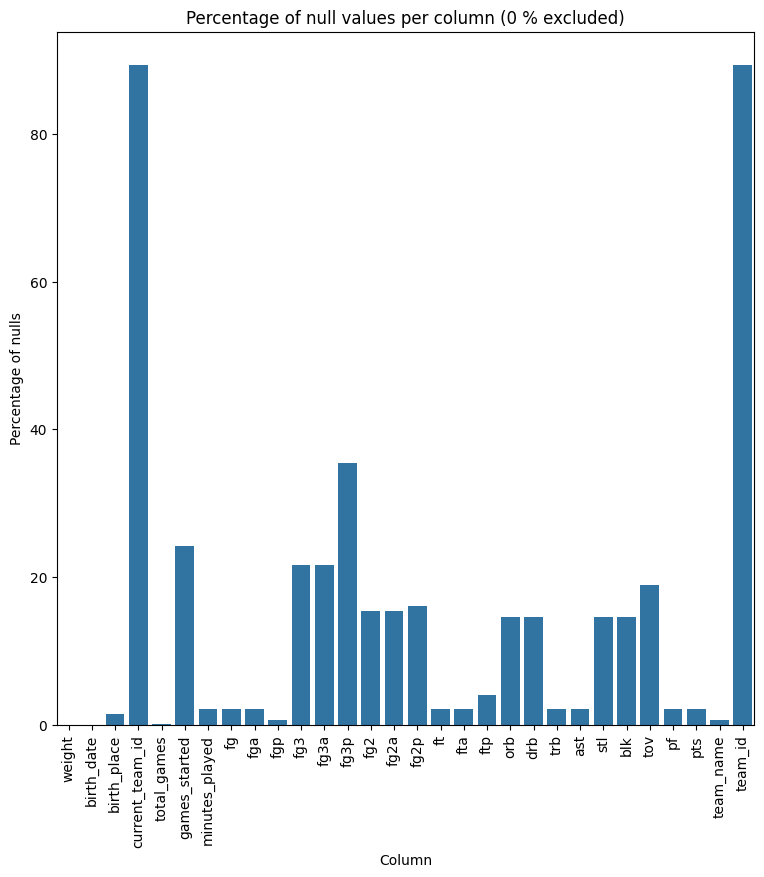

In [99]:
# don't visualize all columns that are zero as there is no need to visualise them
df_null_plot = df2.loc[:,df2.isnull().sum() != 0]
null_per_column = df_null_plot.isnull().sum()
percentage_per_column = null_per_column/len(df_null_plot)*100
percentage_per_column.apply(lambda x: f"{np.round(x,2)} %")

plt.figure(figsize=(9,9))
ax = sns.barplot(percentage_per_column)
ax.tick_params(axis='x', rotation=90)
ax.set_ylabel("Percentage of nulls")
ax.set_xlabel("Column")
ax.set_title("Percentage of null values per column (0 % excluded)")


Plot a graph to check the impact of nan values

Text(0.5, 1.0, 'Heatmap of nulls per column (columns with zero nulls excluded)')

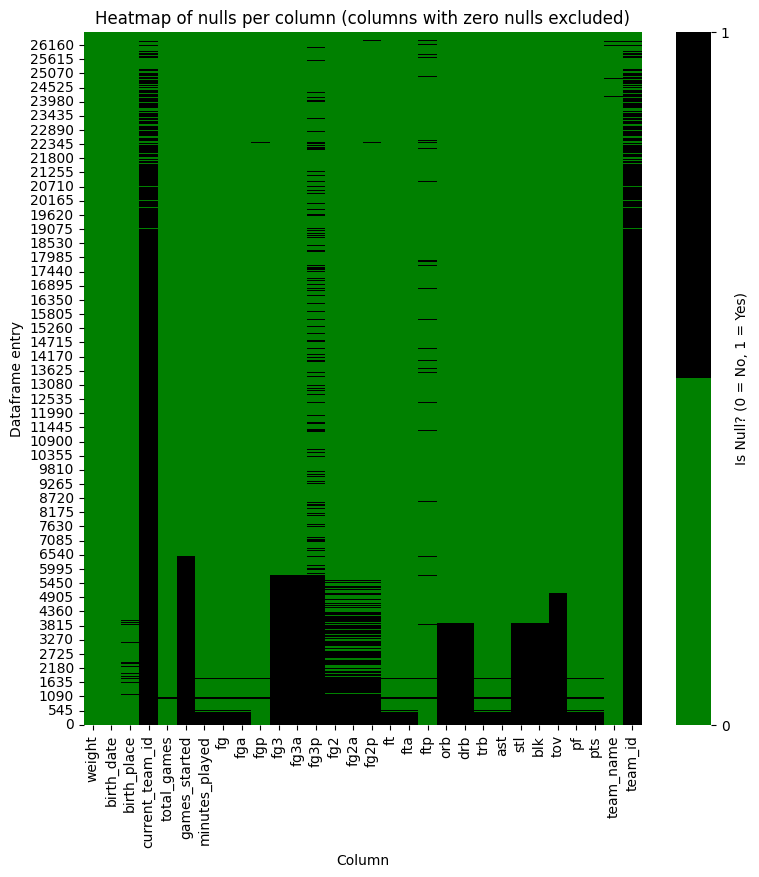

In [100]:
colours = ["green", "black"]
plt.figure(figsize = (9,9))
ax = sns.heatmap(df_null_plot.isnull(),cmap=colours, cbar_kws=({"ticks": [0,1], "label": "Is Null? (0 = No, 1 = Yes)"}))
ax.invert_yaxis()
ax.set_ylabel("Dataframe entry")
ax.set_xlabel("Column")
ax.set_title("Heatmap of nulls per column (columns with zero nulls excluded)")

### @Sasha
Ich habe folgende Vorschläge, wie wir mit dem droppen umgehen könnten:
1. Wir droppen einfach alle Columns bei welchen die Prozentzahl über einer gewissen thresshold ist
2. Wir schauen uns an ob man evtl. den Durchschnitt für Spieler für manche Statisiken berechnen kann. Ich stelle mir das so vor, dass wenn z.B. 80 % der Werte für einen Spieler vorhanden sind, dass wir dann für die restlichen 20% den Durchschnitt berechnen.


# Sasha

In [ ]:
birth_places = df2["birth_place"].unique()

In [ ]:
df2["birth_states"] = df2["birth_place"].str.split(',', expand=True)[1]
df2['birth_states'] = df2['birth_states'].apply(lambda x: str(x).replace(u'\xa0', u''))


In [ ]:
df2["birth_states"].unique()

In [ ]:
all_states = pd.Series(df2["birth_states"].unique())

In [ ]:
US_states = [
    'Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado',
    'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho',
    'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana',
    'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
    'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
    'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
    'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
    'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota',
    'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
    'West Virginia', 'Wisconsin', 'Wyoming'
]


In [ ]:
len(US_states)

Es gab bis 2019 nie einen NBA Spieler aus Vermont 

In [ ]:
np.setdiff1d(US_states, all_states[pd.Series(all_states).isin(US_states)].unique())

In [ ]:
df2_US = df2.loc[df2["birth_states"].isin(US_states)]

In [ ]:
df2_US_map = df2_US[["birth_states", "player_id"]].groupby(["birth_states"]).count().reset_index()

In [ ]:
from urllib.request import urlopen
import json
with urlopen('https://raw.githubusercontent.com/plotly/datasets/master/geojson-counties-fips.json') as response:
    counties = json.load(response)

fig = px.choropleth_mapbox(df2_US_map, geojson=counties, locations='birth_states', color='player_id',
                           color_continuous_scale="Viridis",
                           range_color=(0, 12),
                           mapbox_style="carto-positron",
                           #zoom=3, center = {"lat": 37.0902, "lon": -95.7129},
                           opacity=0.5,
                           labels={'num:_players':'number of players'}
                          )
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

In [ ]:
df2["pts"].isna().value